# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

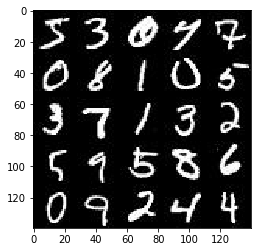

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

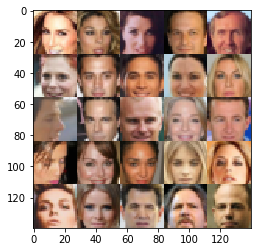

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

C:\Users\F.WAN\AppData\Local\Continuum\miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.8.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    images_ph = tf.placeholder(tf.float32, shape=[None, image_width, image_height, \
                        image_channels], name='images_ph')
    z_input = tf.placeholder(tf.float32, shape=[None, z_dim], name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return images_ph, z_input, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False, alpha=0.01):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
#     leaky_relu = lambda x: tf.maximum(alpha * x, x)
    
#     def conv(inputs, filters, batch_norm=True):
#         outputs = tf.layers.conv2d(inputs, filters, 5, 2, 'same')
#         if batch_norm:
#             outputs = tf.layers.batch_normalization(outputs, training=True)
#         return leaky_relu(outputs)
        
    
#     with tf.variable_scope("discriminator", reuse=reuse):
#         # input 28*28*3
#         x1 = conv(images, 64, batch_norm=False) # 14*14*64
#         x2 = conv(x1, 128) # 7*7*128
#         x3 = conv(x2, 256) # 4*4*256
        
#         flat = tf.reshape(x3, (-1, 4*4*256))
#         logits = tf.layers.dense(flat, 1)
#         out = tf.sigmoid(logits)

#         return out, logits
    with tf.variable_scope('discriminator', reuse=reuse):
        
        conv = tf.layers.conv2d(images, 8, 1, 1, 'SAME')
        conv = tf.layers.conv2d(images, 128, 3, 2, 'SAME', kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=0.01),kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        conv = tf.layers.batch_normalization(conv, training=True)
        conv = tf.nn.relu(features=conv)
#         conv = tf.layers.max_pooling2d(conv, pool_size=2, strides=1)

        conv = tf.layers.conv2d(conv, 64, 5, 2, 'SAME', kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=0.01),kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        conv = tf.layers.batch_normalization(conv, training=True)
        conv = tf.nn.relu(features=conv)
#         conv = tf.layers.max_pooling2d(conv, pool_size=2, strides=1)
        
        conv = tf.layers.conv2d(conv, 32, 3, 2, 'SAME', kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=0.01),kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        conv = tf.layers.batch_normalization(conv, training=True)
        conv = tf.nn.relu(features=conv)
#         conv = tf.layers.max_pooling2d(conv, pool_size=2, strides=1)
        
        flat   = tf.reshape(conv, (-1, 4*4*32))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.01):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    with tf.variable_scope('generator', reuse=not is_train):
            gen_layer = tf.layers.dense(inputs=z, units=7*7*128, use_bias=False)
            gen_layer = tf.reshape(gen_layer, (-1, 7, 7, 128))
            gen_layer = tf.layers.batch_normalization(gen_layer, training=is_train)
            gen_layer = tf.nn.relu(features=gen_layer)



#             gen_layer = tf.layers.conv2d_transpose(gen_layer, 64, 5, 2,'SAME', use_bias=False)
#             gen_layer = tf.layers.batch_normalization(gen_layer, training=is_train)
#             gen_layer = tf.nn.relu(features=gen_layer)

            gen_layer = tf.layers.conv2d_transpose(gen_layer, 52, 5, 2,'SAME', use_bias=False)
            gen_layer = tf.layers.batch_normalization(gen_layer, training=is_train)
            gen_layer = tf.nn.relu(features=gen_layer)


            gen_layer = tf.layers.conv2d_transpose(gen_layer, out_channel_dim, 5, 2,'SAME', use_bias=False)
            out = tf.tanh(gen_layer)

    return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.9):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    # Calculate the Losses for it real, fake & generated models
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    # The Discriminator Loss is the amount of it fake img loss + it real img loss
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    all_vars = tf.trainable_variables()
    d_vars = [v for v in all_vars if v.name.startswith('discriminator')]
    g_vars = [v for v in all_vars if v.name.startswith('generator')]
    
    # Optimizer
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])

    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                steps +=1
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Batch {}...".format(steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, show_n_images, input_z, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Batch 10... Discriminator Loss: 1.7141... Generator Loss: 0.3103
Epoch 1/2... Batch 20... Discriminator Loss: 1.1220... Generator Loss: 1.0185
Epoch 1/2... Batch 30... Discriminator Loss: 1.3703... Generator Loss: 1.0849
Epoch 1/2... Batch 40... Discriminator Loss: 1.3914... Generator Loss: 0.8426
Epoch 1/2... Batch 50... Discriminator Loss: 1.2442... Generator Loss: 0.6495
Epoch 1/2... Batch 60... Discriminator Loss: 1.1692... Generator Loss: 0.8312
Epoch 1/2... Batch 70... Discriminator Loss: 1.2201... Generator Loss: 0.7389
Epoch 1/2... Batch 80... Discriminator Loss: 1.3733... Generator Loss: 1.2668
Epoch 1/2... Batch 90... Discriminator Loss: 1.1659... Generator Loss: 0.5884
Epoch 1/2... Batch 100... Discriminator Loss: 1.0987... Generator Loss: 1.0200


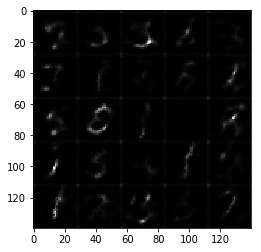

Epoch 1/2... Batch 110... Discriminator Loss: 1.1498... Generator Loss: 0.8910
Epoch 1/2... Batch 120... Discriminator Loss: 1.2542... Generator Loss: 0.5736
Epoch 1/2... Batch 130... Discriminator Loss: 1.0896... Generator Loss: 1.0986
Epoch 1/2... Batch 140... Discriminator Loss: 1.2447... Generator Loss: 0.9341
Epoch 1/2... Batch 150... Discriminator Loss: 1.1940... Generator Loss: 0.8213
Epoch 1/2... Batch 160... Discriminator Loss: 1.1228... Generator Loss: 0.7704
Epoch 1/2... Batch 170... Discriminator Loss: 1.2189... Generator Loss: 1.0317
Epoch 1/2... Batch 180... Discriminator Loss: 1.6293... Generator Loss: 0.3096
Epoch 1/2... Batch 190... Discriminator Loss: 1.2449... Generator Loss: 1.3296
Epoch 1/2... Batch 200... Discriminator Loss: 1.3222... Generator Loss: 0.6572


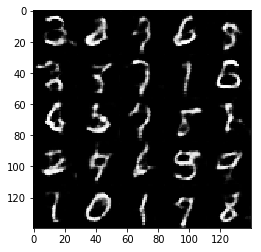

Epoch 1/2... Batch 210... Discriminator Loss: 1.2397... Generator Loss: 0.5425
Epoch 1/2... Batch 220... Discriminator Loss: 1.4031... Generator Loss: 1.0891
Epoch 1/2... Batch 230... Discriminator Loss: 1.4105... Generator Loss: 1.4538
Epoch 2/2... Batch 10... Discriminator Loss: 1.1808... Generator Loss: 0.6875
Epoch 2/2... Batch 20... Discriminator Loss: 1.1823... Generator Loss: 0.8984
Epoch 2/2... Batch 30... Discriminator Loss: 1.1320... Generator Loss: 0.8098
Epoch 2/2... Batch 40... Discriminator Loss: 1.3565... Generator Loss: 0.5229
Epoch 2/2... Batch 50... Discriminator Loss: 1.1728... Generator Loss: 0.7153
Epoch 2/2... Batch 60... Discriminator Loss: 1.1600... Generator Loss: 0.9492
Epoch 2/2... Batch 70... Discriminator Loss: 1.4070... Generator Loss: 0.4133
Epoch 2/2... Batch 80... Discriminator Loss: 1.2176... Generator Loss: 0.6923
Epoch 2/2... Batch 90... Discriminator Loss: 1.8146... Generator Loss: 2.0925
Epoch 2/2... Batch 100... Discriminator Loss: 1.0475... Gener

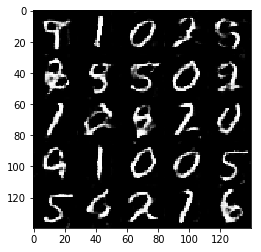

Epoch 2/2... Batch 110... Discriminator Loss: 1.1195... Generator Loss: 0.8417
Epoch 2/2... Batch 120... Discriminator Loss: 1.0809... Generator Loss: 1.4776
Epoch 2/2... Batch 130... Discriminator Loss: 1.1763... Generator Loss: 0.8089
Epoch 2/2... Batch 140... Discriminator Loss: 1.1617... Generator Loss: 0.7622
Epoch 2/2... Batch 150... Discriminator Loss: 1.0829... Generator Loss: 0.8031
Epoch 2/2... Batch 160... Discriminator Loss: 1.4330... Generator Loss: 0.3897
Epoch 2/2... Batch 170... Discriminator Loss: 1.0365... Generator Loss: 0.8175
Epoch 2/2... Batch 180... Discriminator Loss: 1.2826... Generator Loss: 0.5809
Epoch 2/2... Batch 190... Discriminator Loss: 0.9043... Generator Loss: 0.7915
Epoch 2/2... Batch 200... Discriminator Loss: 1.1666... Generator Loss: 0.7828


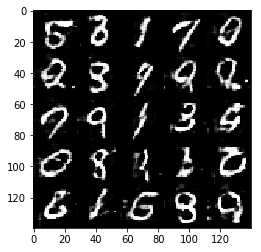

Epoch 2/2... Batch 210... Discriminator Loss: 0.8225... Generator Loss: 1.0917
Epoch 2/2... Batch 220... Discriminator Loss: 1.2905... Generator Loss: 0.7708
Epoch 2/2... Batch 230... Discriminator Loss: 1.2276... Generator Loss: 0.7959


In [31]:
batch_size = 256
z_dim = 10
learning_rate = 0.006
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Batch 10... Discriminator Loss: 0.9476... Generator Loss: 0.6076
Epoch 1/1... Batch 20... Discriminator Loss: 0.3208... Generator Loss: 1.6037
Epoch 1/1... Batch 30... Discriminator Loss: 0.9049... Generator Loss: 0.6848
Epoch 1/1... Batch 40... Discriminator Loss: 0.1081... Generator Loss: 2.9565
Epoch 1/1... Batch 50... Discriminator Loss: 0.9121... Generator Loss: 0.7987
Epoch 1/1... Batch 60... Discriminator Loss: 0.5021... Generator Loss: 1.5838
Epoch 1/1... Batch 70... Discriminator Loss: 1.2565... Generator Loss: 3.6333
Epoch 1/1... Batch 80... Discriminator Loss: 0.4208... Generator Loss: 1.5887
Epoch 1/1... Batch 90... Discriminator Loss: 1.1798... Generator Loss: 0.6779
Epoch 1/1... Batch 100... Discriminator Loss: 0.7896... Generator Loss: 1.1228


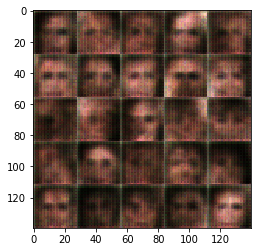

Epoch 1/1... Batch 110... Discriminator Loss: 1.4489... Generator Loss: 3.5953
Epoch 1/1... Batch 120... Discriminator Loss: 1.3721... Generator Loss: 0.3868
Epoch 1/1... Batch 130... Discriminator Loss: 0.9430... Generator Loss: 0.7162
Epoch 1/1... Batch 140... Discriminator Loss: 0.9512... Generator Loss: 0.6520
Epoch 1/1... Batch 150... Discriminator Loss: 1.0205... Generator Loss: 0.6836
Epoch 1/1... Batch 160... Discriminator Loss: 1.3225... Generator Loss: 0.6512
Epoch 1/1... Batch 170... Discriminator Loss: 1.0388... Generator Loss: 0.9569
Epoch 1/1... Batch 180... Discriminator Loss: 0.5700... Generator Loss: 1.0951
Epoch 1/1... Batch 190... Discriminator Loss: 1.4379... Generator Loss: 0.3883
Epoch 1/1... Batch 200... Discriminator Loss: 0.7510... Generator Loss: 0.8378


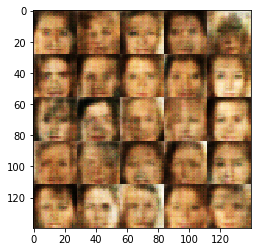

Epoch 1/1... Batch 210... Discriminator Loss: 0.8388... Generator Loss: 0.8003
Epoch 1/1... Batch 220... Discriminator Loss: 0.5031... Generator Loss: 2.1740
Epoch 1/1... Batch 230... Discriminator Loss: 1.3036... Generator Loss: 0.5936
Epoch 1/1... Batch 240... Discriminator Loss: 1.1021... Generator Loss: 0.5630
Epoch 1/1... Batch 250... Discriminator Loss: 1.1595... Generator Loss: 0.7065
Epoch 1/1... Batch 260... Discriminator Loss: 1.7824... Generator Loss: 1.6994
Epoch 1/1... Batch 270... Discriminator Loss: 1.3289... Generator Loss: 0.4044
Epoch 1/1... Batch 280... Discriminator Loss: 1.1379... Generator Loss: 0.8936
Epoch 1/1... Batch 290... Discriminator Loss: 1.0309... Generator Loss: 0.7320
Epoch 1/1... Batch 300... Discriminator Loss: 2.0050... Generator Loss: 2.4410


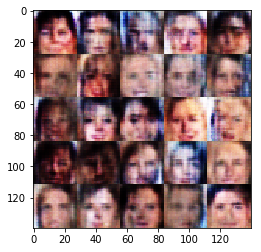

Epoch 1/1... Batch 310... Discriminator Loss: 1.3159... Generator Loss: 0.4178
Epoch 1/1... Batch 320... Discriminator Loss: 0.9972... Generator Loss: 0.9606
Epoch 1/1... Batch 330... Discriminator Loss: 1.0859... Generator Loss: 0.5808
Epoch 1/1... Batch 340... Discriminator Loss: 1.2010... Generator Loss: 1.1818
Epoch 1/1... Batch 350... Discriminator Loss: 1.1876... Generator Loss: 0.7255
Epoch 1/1... Batch 360... Discriminator Loss: 1.4032... Generator Loss: 0.3600
Epoch 1/1... Batch 370... Discriminator Loss: 1.0304... Generator Loss: 1.0037
Epoch 1/1... Batch 380... Discriminator Loss: 1.2735... Generator Loss: 0.4985
Epoch 1/1... Batch 390... Discriminator Loss: 1.1799... Generator Loss: 0.5937
Epoch 1/1... Batch 400... Discriminator Loss: 1.1078... Generator Loss: 0.9255


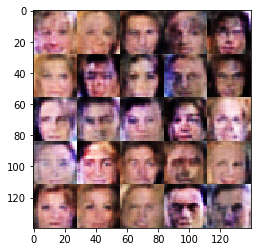

Epoch 1/1... Batch 410... Discriminator Loss: 1.2696... Generator Loss: 0.6574
Epoch 1/1... Batch 420... Discriminator Loss: 1.5177... Generator Loss: 0.3314
Epoch 1/1... Batch 430... Discriminator Loss: 1.7111... Generator Loss: 0.2436
Epoch 1/1... Batch 440... Discriminator Loss: 1.0227... Generator Loss: 0.7140
Epoch 1/1... Batch 450... Discriminator Loss: 1.1895... Generator Loss: 0.6334
Epoch 1/1... Batch 460... Discriminator Loss: 1.4717... Generator Loss: 0.3350
Epoch 1/1... Batch 470... Discriminator Loss: 1.1737... Generator Loss: 0.6065
Epoch 1/1... Batch 480... Discriminator Loss: 1.7857... Generator Loss: 0.2476
Epoch 1/1... Batch 490... Discriminator Loss: 1.2162... Generator Loss: 0.7325
Epoch 1/1... Batch 500... Discriminator Loss: 1.2593... Generator Loss: 0.4686


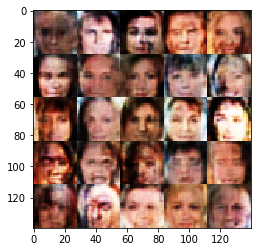

Epoch 1/1... Batch 510... Discriminator Loss: 1.2753... Generator Loss: 0.5932
Epoch 1/1... Batch 520... Discriminator Loss: 1.0375... Generator Loss: 0.7209
Epoch 1/1... Batch 530... Discriminator Loss: 1.1840... Generator Loss: 0.6627
Epoch 1/1... Batch 540... Discriminator Loss: 0.8946... Generator Loss: 0.8299
Epoch 1/1... Batch 550... Discriminator Loss: 1.5379... Generator Loss: 0.5284
Epoch 1/1... Batch 560... Discriminator Loss: 1.2535... Generator Loss: 0.6930
Epoch 1/1... Batch 570... Discriminator Loss: 1.2721... Generator Loss: 0.6717
Epoch 1/1... Batch 580... Discriminator Loss: 1.1458... Generator Loss: 0.7987
Epoch 1/1... Batch 590... Discriminator Loss: 1.3655... Generator Loss: 0.3954
Epoch 1/1... Batch 600... Discriminator Loss: 1.1671... Generator Loss: 0.7244


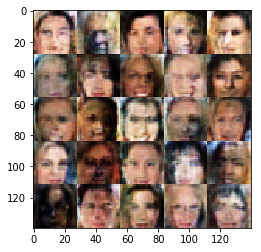

Epoch 1/1... Batch 610... Discriminator Loss: 1.4204... Generator Loss: 0.3631
Epoch 1/1... Batch 620... Discriminator Loss: 1.2858... Generator Loss: 0.5605
Epoch 1/1... Batch 630... Discriminator Loss: 1.2255... Generator Loss: 0.5863
Epoch 1/1... Batch 640... Discriminator Loss: 1.4442... Generator Loss: 0.3717
Epoch 1/1... Batch 650... Discriminator Loss: 1.2081... Generator Loss: 0.5510
Epoch 1/1... Batch 660... Discriminator Loss: 1.2995... Generator Loss: 1.0650
Epoch 1/1... Batch 670... Discriminator Loss: 1.2533... Generator Loss: 0.5337
Epoch 1/1... Batch 680... Discriminator Loss: 1.3151... Generator Loss: 0.5245
Epoch 1/1... Batch 690... Discriminator Loss: 1.2620... Generator Loss: 0.7943
Epoch 1/1... Batch 700... Discriminator Loss: 1.2921... Generator Loss: 0.5569


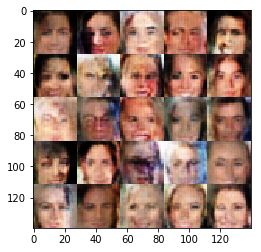

Epoch 1/1... Batch 710... Discriminator Loss: 1.1669... Generator Loss: 0.6093
Epoch 1/1... Batch 720... Discriminator Loss: 1.2696... Generator Loss: 0.9983
Epoch 1/1... Batch 730... Discriminator Loss: 1.2008... Generator Loss: 0.6363
Epoch 1/1... Batch 740... Discriminator Loss: 1.3332... Generator Loss: 1.2564
Epoch 1/1... Batch 750... Discriminator Loss: 1.1039... Generator Loss: 0.9840
Epoch 1/1... Batch 760... Discriminator Loss: 1.2542... Generator Loss: 0.7365
Epoch 1/1... Batch 770... Discriminator Loss: 1.9331... Generator Loss: 0.1982
Epoch 1/1... Batch 780... Discriminator Loss: 1.1877... Generator Loss: 0.7329
Epoch 1/1... Batch 790... Discriminator Loss: 1.4737... Generator Loss: 0.3663
Epoch 1/1... Batch 800... Discriminator Loss: 1.1469... Generator Loss: 1.0214


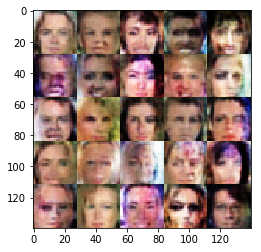

Epoch 1/1... Batch 810... Discriminator Loss: 1.6520... Generator Loss: 0.2889
Epoch 1/1... Batch 820... Discriminator Loss: 1.7314... Generator Loss: 0.2539
Epoch 1/1... Batch 830... Discriminator Loss: 1.2332... Generator Loss: 0.7784
Epoch 1/1... Batch 840... Discriminator Loss: 1.0502... Generator Loss: 0.8093
Epoch 1/1... Batch 850... Discriminator Loss: 1.1657... Generator Loss: 0.6748
Epoch 1/1... Batch 860... Discriminator Loss: 1.6485... Generator Loss: 0.3152
Epoch 1/1... Batch 870... Discriminator Loss: 1.4906... Generator Loss: 1.1983
Epoch 1/1... Batch 880... Discriminator Loss: 1.3567... Generator Loss: 0.4328
Epoch 1/1... Batch 890... Discriminator Loss: 1.2746... Generator Loss: 0.6111
Epoch 1/1... Batch 900... Discriminator Loss: 1.6101... Generator Loss: 0.3099


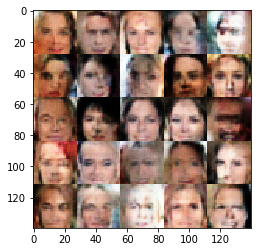

Epoch 1/1... Batch 910... Discriminator Loss: 1.2243... Generator Loss: 0.9005
Epoch 1/1... Batch 920... Discriminator Loss: 1.4113... Generator Loss: 0.4368
Epoch 1/1... Batch 930... Discriminator Loss: 1.2733... Generator Loss: 0.6103
Epoch 1/1... Batch 940... Discriminator Loss: 1.0315... Generator Loss: 0.6739
Epoch 1/1... Batch 950... Discriminator Loss: 1.2382... Generator Loss: 0.6349
Epoch 1/1... Batch 960... Discriminator Loss: 1.3192... Generator Loss: 0.9752
Epoch 1/1... Batch 970... Discriminator Loss: 1.4696... Generator Loss: 0.4046
Epoch 1/1... Batch 980... Discriminator Loss: 1.3464... Generator Loss: 0.4842
Epoch 1/1... Batch 990... Discriminator Loss: 1.2229... Generator Loss: 0.6281
Epoch 1/1... Batch 1000... Discriminator Loss: 1.2996... Generator Loss: 0.4945


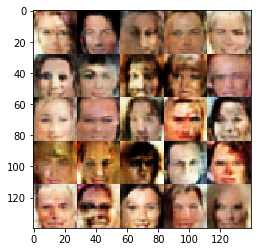

Epoch 1/1... Batch 1010... Discriminator Loss: 1.6359... Generator Loss: 0.2651
Epoch 1/1... Batch 1020... Discriminator Loss: 1.4188... Generator Loss: 0.3857
Epoch 1/1... Batch 1030... Discriminator Loss: 1.6069... Generator Loss: 0.2975
Epoch 1/1... Batch 1040... Discriminator Loss: 1.2018... Generator Loss: 0.5547
Epoch 1/1... Batch 1050... Discriminator Loss: 1.2539... Generator Loss: 0.8072
Epoch 1/1... Batch 1060... Discriminator Loss: 1.4027... Generator Loss: 0.7226
Epoch 1/1... Batch 1070... Discriminator Loss: 1.9416... Generator Loss: 0.1856
Epoch 1/1... Batch 1080... Discriminator Loss: 1.3092... Generator Loss: 0.6102
Epoch 1/1... Batch 1090... Discriminator Loss: 1.8811... Generator Loss: 0.2017
Epoch 1/1... Batch 1100... Discriminator Loss: 1.4188... Generator Loss: 0.3781


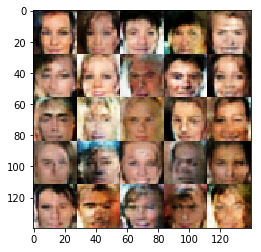

Epoch 1/1... Batch 1110... Discriminator Loss: 1.4644... Generator Loss: 0.4008
Epoch 1/1... Batch 1120... Discriminator Loss: 1.4298... Generator Loss: 0.3435
Epoch 1/1... Batch 1130... Discriminator Loss: 1.6228... Generator Loss: 0.2706
Epoch 1/1... Batch 1140... Discriminator Loss: 1.2725... Generator Loss: 0.5526
Epoch 1/1... Batch 1150... Discriminator Loss: 0.9983... Generator Loss: 0.7740
Epoch 1/1... Batch 1160... Discriminator Loss: 1.5009... Generator Loss: 1.1828
Epoch 1/1... Batch 1170... Discriminator Loss: 1.5702... Generator Loss: 0.3080
Epoch 1/1... Batch 1180... Discriminator Loss: 1.5210... Generator Loss: 0.3893
Epoch 1/1... Batch 1190... Discriminator Loss: 1.3642... Generator Loss: 1.3830
Epoch 1/1... Batch 1200... Discriminator Loss: 1.5219... Generator Loss: 0.3563


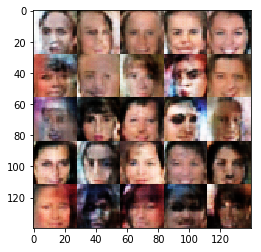

Epoch 1/1... Batch 1210... Discriminator Loss: 0.9911... Generator Loss: 0.7280
Epoch 1/1... Batch 1220... Discriminator Loss: 1.4396... Generator Loss: 0.4721
Epoch 1/1... Batch 1230... Discriminator Loss: 1.5602... Generator Loss: 0.2951
Epoch 1/1... Batch 1240... Discriminator Loss: 1.3166... Generator Loss: 0.7323
Epoch 1/1... Batch 1250... Discriminator Loss: 1.3245... Generator Loss: 0.6515
Epoch 1/1... Batch 1260... Discriminator Loss: 1.5217... Generator Loss: 0.9805
Epoch 1/1... Batch 1270... Discriminator Loss: 1.2146... Generator Loss: 0.8016
Epoch 1/1... Batch 1280... Discriminator Loss: 1.4718... Generator Loss: 0.3470
Epoch 1/1... Batch 1290... Discriminator Loss: 1.1364... Generator Loss: 1.2416
Epoch 1/1... Batch 1300... Discriminator Loss: 1.2493... Generator Loss: 0.5602


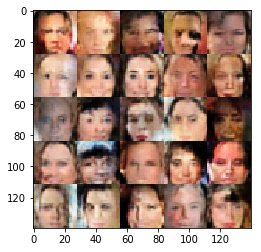

Epoch 1/1... Batch 1310... Discriminator Loss: 1.3347... Generator Loss: 1.0650
Epoch 1/1... Batch 1320... Discriminator Loss: 1.3611... Generator Loss: 0.4106
Epoch 1/1... Batch 1330... Discriminator Loss: 1.0780... Generator Loss: 0.8397
Epoch 1/1... Batch 1340... Discriminator Loss: 1.2546... Generator Loss: 0.6365
Epoch 1/1... Batch 1350... Discriminator Loss: 1.4747... Generator Loss: 0.3502
Epoch 1/1... Batch 1360... Discriminator Loss: 1.4331... Generator Loss: 0.4219
Epoch 1/1... Batch 1370... Discriminator Loss: 1.4608... Generator Loss: 1.7473
Epoch 1/1... Batch 1380... Discriminator Loss: 1.2683... Generator Loss: 0.5333
Epoch 1/1... Batch 1390... Discriminator Loss: 1.2844... Generator Loss: 1.0509
Epoch 1/1... Batch 1400... Discriminator Loss: 1.1680... Generator Loss: 0.7480


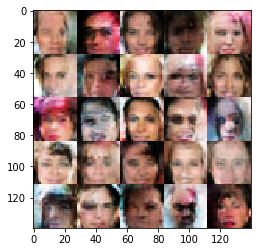

Epoch 1/1... Batch 1410... Discriminator Loss: 1.3147... Generator Loss: 0.4949
Epoch 1/1... Batch 1420... Discriminator Loss: 1.5901... Generator Loss: 0.5737
Epoch 1/1... Batch 1430... Discriminator Loss: 1.1736... Generator Loss: 0.7619
Epoch 1/1... Batch 1440... Discriminator Loss: 1.3734... Generator Loss: 0.3906
Epoch 1/1... Batch 1450... Discriminator Loss: 1.3182... Generator Loss: 0.4627
Epoch 1/1... Batch 1460... Discriminator Loss: 1.6515... Generator Loss: 1.3274
Epoch 1/1... Batch 1470... Discriminator Loss: 1.2313... Generator Loss: 0.5886
Epoch 1/1... Batch 1480... Discriminator Loss: 1.9150... Generator Loss: 0.2002
Epoch 1/1... Batch 1490... Discriminator Loss: 1.6305... Generator Loss: 0.2746
Epoch 1/1... Batch 1500... Discriminator Loss: 1.2779... Generator Loss: 0.6707


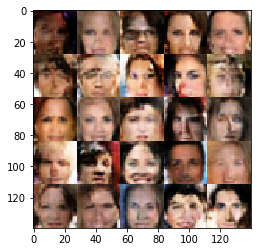

Epoch 1/1... Batch 1510... Discriminator Loss: 1.0496... Generator Loss: 0.7842
Epoch 1/1... Batch 1520... Discriminator Loss: 1.2900... Generator Loss: 0.5482
Epoch 1/1... Batch 1530... Discriminator Loss: 1.5110... Generator Loss: 0.3195
Epoch 1/1... Batch 1540... Discriminator Loss: 1.1297... Generator Loss: 0.6623
Epoch 1/1... Batch 1550... Discriminator Loss: 1.1701... Generator Loss: 0.7484
Epoch 1/1... Batch 1560... Discriminator Loss: 1.4270... Generator Loss: 0.4145
Epoch 1/1... Batch 1570... Discriminator Loss: 1.4304... Generator Loss: 1.3277
Epoch 1/1... Batch 1580... Discriminator Loss: 1.4788... Generator Loss: 0.3735
Epoch 1/1... Batch 1590... Discriminator Loss: 1.5943... Generator Loss: 1.4469
Epoch 1/1... Batch 1600... Discriminator Loss: 1.2150... Generator Loss: 0.7778


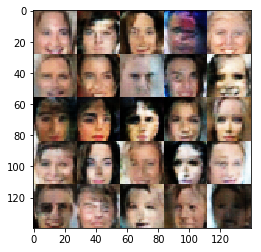

Epoch 1/1... Batch 1610... Discriminator Loss: 1.3168... Generator Loss: 0.6231
Epoch 1/1... Batch 1620... Discriminator Loss: 1.7857... Generator Loss: 0.2523
Epoch 1/1... Batch 1630... Discriminator Loss: 1.2181... Generator Loss: 0.7160
Epoch 1/1... Batch 1640... Discriminator Loss: 1.3355... Generator Loss: 0.6090
Epoch 1/1... Batch 1650... Discriminator Loss: 1.3134... Generator Loss: 0.6004
Epoch 1/1... Batch 1660... Discriminator Loss: 1.2301... Generator Loss: 0.5803
Epoch 1/1... Batch 1670... Discriminator Loss: 1.4129... Generator Loss: 0.4315
Epoch 1/1... Batch 1680... Discriminator Loss: 1.2438... Generator Loss: 0.5814
Epoch 1/1... Batch 1690... Discriminator Loss: 1.7657... Generator Loss: 0.2536
Epoch 1/1... Batch 1700... Discriminator Loss: 1.2197... Generator Loss: 0.5391


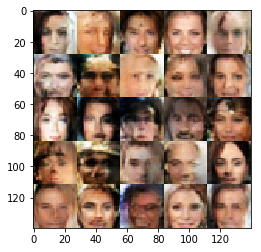

Epoch 1/1... Batch 1710... Discriminator Loss: 1.3554... Generator Loss: 0.7342
Epoch 1/1... Batch 1720... Discriminator Loss: 1.1079... Generator Loss: 1.1312
Epoch 1/1... Batch 1730... Discriminator Loss: 1.1860... Generator Loss: 0.7320
Epoch 1/1... Batch 1740... Discriminator Loss: 1.3275... Generator Loss: 0.6311
Epoch 1/1... Batch 1750... Discriminator Loss: 1.3538... Generator Loss: 0.6698
Epoch 1/1... Batch 1760... Discriminator Loss: 1.5031... Generator Loss: 0.3568
Epoch 1/1... Batch 1770... Discriminator Loss: 1.1034... Generator Loss: 0.7720
Epoch 1/1... Batch 1780... Discriminator Loss: 1.4744... Generator Loss: 0.4068
Epoch 1/1... Batch 1790... Discriminator Loss: 1.4338... Generator Loss: 1.0605
Epoch 1/1... Batch 1800... Discriminator Loss: 1.3435... Generator Loss: 0.4744


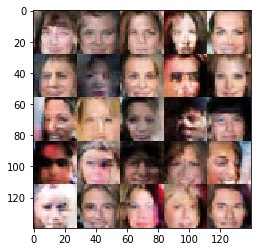

Epoch 1/1... Batch 1810... Discriminator Loss: 1.2116... Generator Loss: 1.2185
Epoch 1/1... Batch 1820... Discriminator Loss: 1.1340... Generator Loss: 0.6039
Epoch 1/1... Batch 1830... Discriminator Loss: 1.2563... Generator Loss: 0.7264
Epoch 1/1... Batch 1840... Discriminator Loss: 1.2832... Generator Loss: 0.4400
Epoch 1/1... Batch 1850... Discriminator Loss: 1.5762... Generator Loss: 0.3254
Epoch 1/1... Batch 1860... Discriminator Loss: 1.5013... Generator Loss: 0.3531
Epoch 1/1... Batch 1870... Discriminator Loss: 1.9509... Generator Loss: 0.1929
Epoch 1/1... Batch 1880... Discriminator Loss: 1.6630... Generator Loss: 0.2658
Epoch 1/1... Batch 1890... Discriminator Loss: 1.4546... Generator Loss: 0.3413
Epoch 1/1... Batch 1900... Discriminator Loss: 1.1076... Generator Loss: 0.7225


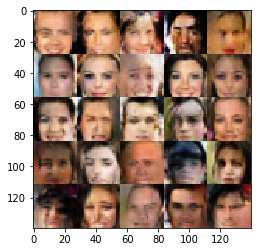

Epoch 1/1... Batch 1910... Discriminator Loss: 1.2022... Generator Loss: 0.6946
Epoch 1/1... Batch 1920... Discriminator Loss: 2.3109... Generator Loss: 0.1451
Epoch 1/1... Batch 1930... Discriminator Loss: 1.5741... Generator Loss: 0.3217
Epoch 1/1... Batch 1940... Discriminator Loss: 1.3705... Generator Loss: 0.4690
Epoch 1/1... Batch 1950... Discriminator Loss: 1.9013... Generator Loss: 0.2092
Epoch 1/1... Batch 1960... Discriminator Loss: 1.6496... Generator Loss: 0.2715
Epoch 1/1... Batch 1970... Discriminator Loss: 1.5315... Generator Loss: 0.3753
Epoch 1/1... Batch 1980... Discriminator Loss: 1.0175... Generator Loss: 0.7775
Epoch 1/1... Batch 1990... Discriminator Loss: 1.3089... Generator Loss: 0.5233
Epoch 1/1... Batch 2000... Discriminator Loss: 1.6175... Generator Loss: 0.2844


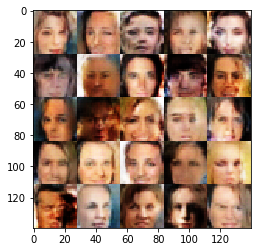

Epoch 1/1... Batch 2010... Discriminator Loss: 1.5416... Generator Loss: 0.3347
Epoch 1/1... Batch 2020... Discriminator Loss: 1.4776... Generator Loss: 0.3615
Epoch 1/1... Batch 2030... Discriminator Loss: 1.4514... Generator Loss: 0.3739
Epoch 1/1... Batch 2040... Discriminator Loss: 1.5186... Generator Loss: 0.3778
Epoch 1/1... Batch 2050... Discriminator Loss: 1.3691... Generator Loss: 0.4006
Epoch 1/1... Batch 2060... Discriminator Loss: 1.3230... Generator Loss: 1.3647
Epoch 1/1... Batch 2070... Discriminator Loss: 1.3324... Generator Loss: 0.6274
Epoch 1/1... Batch 2080... Discriminator Loss: 1.7694... Generator Loss: 0.2390
Epoch 1/1... Batch 2090... Discriminator Loss: 1.4273... Generator Loss: 0.5382
Epoch 1/1... Batch 2100... Discriminator Loss: 1.3100... Generator Loss: 0.4548


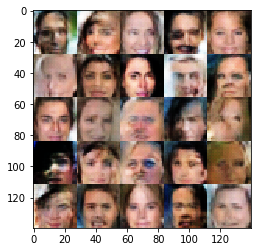

Epoch 1/1... Batch 2110... Discriminator Loss: 1.6276... Generator Loss: 0.3114
Epoch 1/1... Batch 2120... Discriminator Loss: 1.6255... Generator Loss: 0.2809
Epoch 1/1... Batch 2130... Discriminator Loss: 1.6831... Generator Loss: 0.2608
Epoch 1/1... Batch 2140... Discriminator Loss: 1.2623... Generator Loss: 0.6134
Epoch 1/1... Batch 2150... Discriminator Loss: 1.4326... Generator Loss: 0.6596
Epoch 1/1... Batch 2160... Discriminator Loss: 1.3334... Generator Loss: 0.5299
Epoch 1/1... Batch 2170... Discriminator Loss: 1.4020... Generator Loss: 0.4965
Epoch 1/1... Batch 2180... Discriminator Loss: 2.2039... Generator Loss: 0.1398
Epoch 1/1... Batch 2190... Discriminator Loss: 1.4859... Generator Loss: 0.3410
Epoch 1/1... Batch 2200... Discriminator Loss: 1.2256... Generator Loss: 0.5791


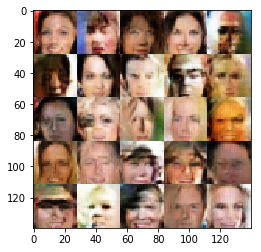

Epoch 1/1... Batch 2210... Discriminator Loss: 1.5010... Generator Loss: 0.3691
Epoch 1/1... Batch 2220... Discriminator Loss: 1.5582... Generator Loss: 0.3302
Epoch 1/1... Batch 2230... Discriminator Loss: 1.3579... Generator Loss: 0.5268
Epoch 1/1... Batch 2240... Discriminator Loss: 1.2814... Generator Loss: 0.5626
Epoch 1/1... Batch 2250... Discriminator Loss: 1.0334... Generator Loss: 1.0725
Epoch 1/1... Batch 2260... Discriminator Loss: 1.6552... Generator Loss: 0.2785
Epoch 1/1... Batch 2270... Discriminator Loss: 1.4690... Generator Loss: 0.3801
Epoch 1/1... Batch 2280... Discriminator Loss: 1.5770... Generator Loss: 0.4020
Epoch 1/1... Batch 2290... Discriminator Loss: 1.3099... Generator Loss: 0.6887
Epoch 1/1... Batch 2300... Discriminator Loss: 1.0621... Generator Loss: 0.9967


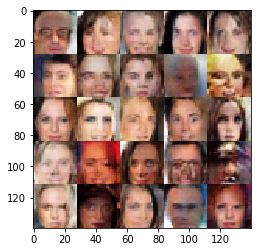

Epoch 1/1... Batch 2310... Discriminator Loss: 1.7318... Generator Loss: 0.2742
Epoch 1/1... Batch 2320... Discriminator Loss: 1.4018... Generator Loss: 0.5544
Epoch 1/1... Batch 2330... Discriminator Loss: 1.8588... Generator Loss: 0.2178
Epoch 1/1... Batch 2340... Discriminator Loss: 1.5491... Generator Loss: 0.3224
Epoch 1/1... Batch 2350... Discriminator Loss: 1.4486... Generator Loss: 0.3451
Epoch 1/1... Batch 2360... Discriminator Loss: 1.8659... Generator Loss: 0.2098
Epoch 1/1... Batch 2370... Discriminator Loss: 1.2513... Generator Loss: 0.7471
Epoch 1/1... Batch 2380... Discriminator Loss: 1.2125... Generator Loss: 0.6669
Epoch 1/1... Batch 2390... Discriminator Loss: 1.2507... Generator Loss: 0.6142
Epoch 1/1... Batch 2400... Discriminator Loss: 1.5766... Generator Loss: 0.3065


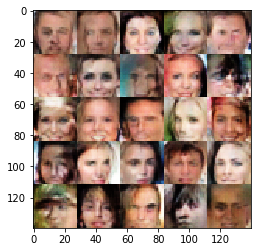

Epoch 1/1... Batch 2410... Discriminator Loss: 1.2772... Generator Loss: 0.7715
Epoch 1/1... Batch 2420... Discriminator Loss: 1.6165... Generator Loss: 0.2897
Epoch 1/1... Batch 2430... Discriminator Loss: 1.2844... Generator Loss: 0.5088
Epoch 1/1... Batch 2440... Discriminator Loss: 1.0946... Generator Loss: 0.8626
Epoch 1/1... Batch 2450... Discriminator Loss: 1.5327... Generator Loss: 0.3585
Epoch 1/1... Batch 2460... Discriminator Loss: 1.1976... Generator Loss: 0.6509
Epoch 1/1... Batch 2470... Discriminator Loss: 1.4148... Generator Loss: 0.5016
Epoch 1/1... Batch 2480... Discriminator Loss: 1.5959... Generator Loss: 0.3001
Epoch 1/1... Batch 2490... Discriminator Loss: 1.5393... Generator Loss: 0.3419
Epoch 1/1... Batch 2500... Discriminator Loss: 1.8078... Generator Loss: 0.2208


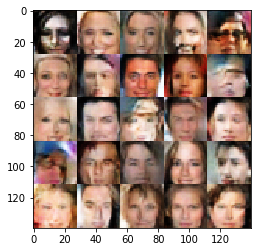

Epoch 1/1... Batch 2510... Discriminator Loss: 1.3409... Generator Loss: 0.5265
Epoch 1/1... Batch 2520... Discriminator Loss: 1.4502... Generator Loss: 0.4365
Epoch 1/1... Batch 2530... Discriminator Loss: 1.1358... Generator Loss: 0.8451
Epoch 1/1... Batch 2540... Discriminator Loss: 1.3843... Generator Loss: 0.7154
Epoch 1/1... Batch 2550... Discriminator Loss: 1.4045... Generator Loss: 0.5152
Epoch 1/1... Batch 2560... Discriminator Loss: 1.3872... Generator Loss: 0.4779
Epoch 1/1... Batch 2570... Discriminator Loss: 1.2595... Generator Loss: 0.6543
Epoch 1/1... Batch 2580... Discriminator Loss: 1.5125... Generator Loss: 0.3724
Epoch 1/1... Batch 2590... Discriminator Loss: 1.3433... Generator Loss: 0.4412
Epoch 1/1... Batch 2600... Discriminator Loss: 1.5799... Generator Loss: 0.3567


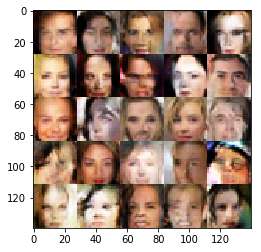

Epoch 1/1... Batch 2610... Discriminator Loss: 1.7147... Generator Loss: 0.2479
Epoch 1/1... Batch 2620... Discriminator Loss: 1.6723... Generator Loss: 0.2996
Epoch 1/1... Batch 2630... Discriminator Loss: 1.6686... Generator Loss: 0.2558
Epoch 1/1... Batch 2640... Discriminator Loss: 1.8046... Generator Loss: 0.2341
Epoch 1/1... Batch 2650... Discriminator Loss: 1.3469... Generator Loss: 0.4934
Epoch 1/1... Batch 2660... Discriminator Loss: 1.1679... Generator Loss: 0.6160
Epoch 1/1... Batch 2670... Discriminator Loss: 1.3847... Generator Loss: 0.7644
Epoch 1/1... Batch 2680... Discriminator Loss: 1.4370... Generator Loss: 0.4052
Epoch 1/1... Batch 2690... Discriminator Loss: 1.7333... Generator Loss: 0.2589
Epoch 1/1... Batch 2700... Discriminator Loss: 1.3064... Generator Loss: 0.4134


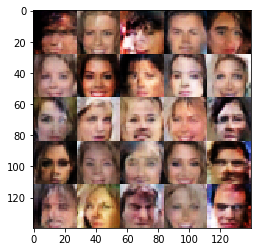

Epoch 1/1... Batch 2710... Discriminator Loss: 1.7624... Generator Loss: 1.5981
Epoch 1/1... Batch 2720... Discriminator Loss: 1.5651... Generator Loss: 0.3467
Epoch 1/1... Batch 2730... Discriminator Loss: 1.7318... Generator Loss: 0.2823
Epoch 1/1... Batch 2740... Discriminator Loss: 1.1623... Generator Loss: 0.6444
Epoch 1/1... Batch 2750... Discriminator Loss: 1.4350... Generator Loss: 0.7079
Epoch 1/1... Batch 2760... Discriminator Loss: 1.3704... Generator Loss: 0.6257
Epoch 1/1... Batch 2770... Discriminator Loss: 1.4661... Generator Loss: 0.3936
Epoch 1/1... Batch 2780... Discriminator Loss: 1.3243... Generator Loss: 0.5398
Epoch 1/1... Batch 2790... Discriminator Loss: 1.4569... Generator Loss: 1.3070
Epoch 1/1... Batch 2800... Discriminator Loss: 1.1579... Generator Loss: 0.6548


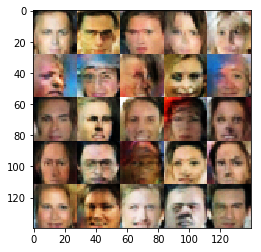

Epoch 1/1... Batch 2810... Discriminator Loss: 1.6003... Generator Loss: 0.3579
Epoch 1/1... Batch 2820... Discriminator Loss: 1.3456... Generator Loss: 0.5821
Epoch 1/1... Batch 2830... Discriminator Loss: 1.1591... Generator Loss: 0.5308
Epoch 1/1... Batch 2840... Discriminator Loss: 1.0623... Generator Loss: 0.8275
Epoch 1/1... Batch 2850... Discriminator Loss: 1.1365... Generator Loss: 0.6790
Epoch 1/1... Batch 2860... Discriminator Loss: 1.2234... Generator Loss: 0.5647
Epoch 1/1... Batch 2870... Discriminator Loss: 1.2852... Generator Loss: 0.5764
Epoch 1/1... Batch 2880... Discriminator Loss: 1.2963... Generator Loss: 0.4373
Epoch 1/1... Batch 2890... Discriminator Loss: 1.3909... Generator Loss: 0.4572
Epoch 1/1... Batch 2900... Discriminator Loss: 1.8267... Generator Loss: 0.2745


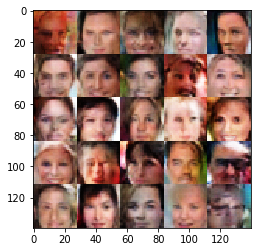

Epoch 1/1... Batch 2910... Discriminator Loss: 2.2031... Generator Loss: 0.1475
Epoch 1/1... Batch 2920... Discriminator Loss: 1.2697... Generator Loss: 0.6769
Epoch 1/1... Batch 2930... Discriminator Loss: 1.2363... Generator Loss: 0.7088
Epoch 1/1... Batch 2940... Discriminator Loss: 1.3345... Generator Loss: 0.5078
Epoch 1/1... Batch 2950... Discriminator Loss: 1.7465... Generator Loss: 0.2462
Epoch 1/1... Batch 2960... Discriminator Loss: 1.2357... Generator Loss: 0.5933
Epoch 1/1... Batch 2970... Discriminator Loss: 1.1615... Generator Loss: 0.5908
Epoch 1/1... Batch 2980... Discriminator Loss: 1.3457... Generator Loss: 0.4509
Epoch 1/1... Batch 2990... Discriminator Loss: 1.4134... Generator Loss: 0.4379
Epoch 1/1... Batch 3000... Discriminator Loss: 2.2400... Generator Loss: 0.1536


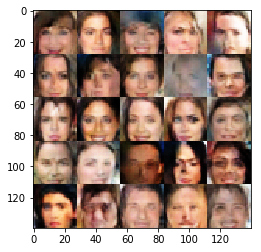

Epoch 1/1... Batch 3010... Discriminator Loss: 1.7437... Generator Loss: 0.2806
Epoch 1/1... Batch 3020... Discriminator Loss: 1.2048... Generator Loss: 0.7051
Epoch 1/1... Batch 3030... Discriminator Loss: 1.3742... Generator Loss: 0.9245
Epoch 1/1... Batch 3040... Discriminator Loss: 1.7256... Generator Loss: 0.3259
Epoch 1/1... Batch 3050... Discriminator Loss: 1.3573... Generator Loss: 0.4782
Epoch 1/1... Batch 3060... Discriminator Loss: 1.1750... Generator Loss: 0.6487
Epoch 1/1... Batch 3070... Discriminator Loss: 1.3770... Generator Loss: 0.4253
Epoch 1/1... Batch 3080... Discriminator Loss: 1.2205... Generator Loss: 0.5254
Epoch 1/1... Batch 3090... Discriminator Loss: 1.4489... Generator Loss: 0.3828
Epoch 1/1... Batch 3100... Discriminator Loss: 1.5540... Generator Loss: 0.3630


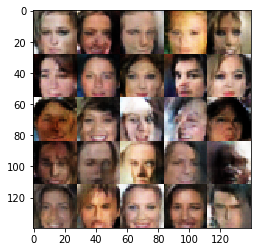

Epoch 1/1... Batch 3110... Discriminator Loss: 1.8396... Generator Loss: 0.2167
Epoch 1/1... Batch 3120... Discriminator Loss: 1.5077... Generator Loss: 0.3055
Epoch 1/1... Batch 3130... Discriminator Loss: 1.4358... Generator Loss: 0.3521
Epoch 1/1... Batch 3140... Discriminator Loss: 1.8430... Generator Loss: 0.2608
Epoch 1/1... Batch 3150... Discriminator Loss: 1.5341... Generator Loss: 0.3788
Epoch 1/1... Batch 3160... Discriminator Loss: 2.2108... Generator Loss: 0.1358


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0007
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.